# Burned Area Calculation

#### Importing Packages

In [1]:
import rasterio                      #For .hdf Processing and Vizualization
import matplotlib                    #For Plotting Stylization
import numpy as np                   #For Calulations
import matplotlib.pyplot as plt      #For Plotting
import matplotlib.patches as patches #For Image Overlays
import gdal                          #This is for using hdf files

#### Graph Formatting

In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14 #Setting Figure Size in first dimension
fig_size[1] = 10 #Setting Figure Size in second dimension
plt.rcParams["figure.figsize"] = fig_size #Applying the parameters

font = {'family':'Times New Roman', #Setting the font characteristics
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font) #Applying the font

## Using GDAL to Process .tif Images

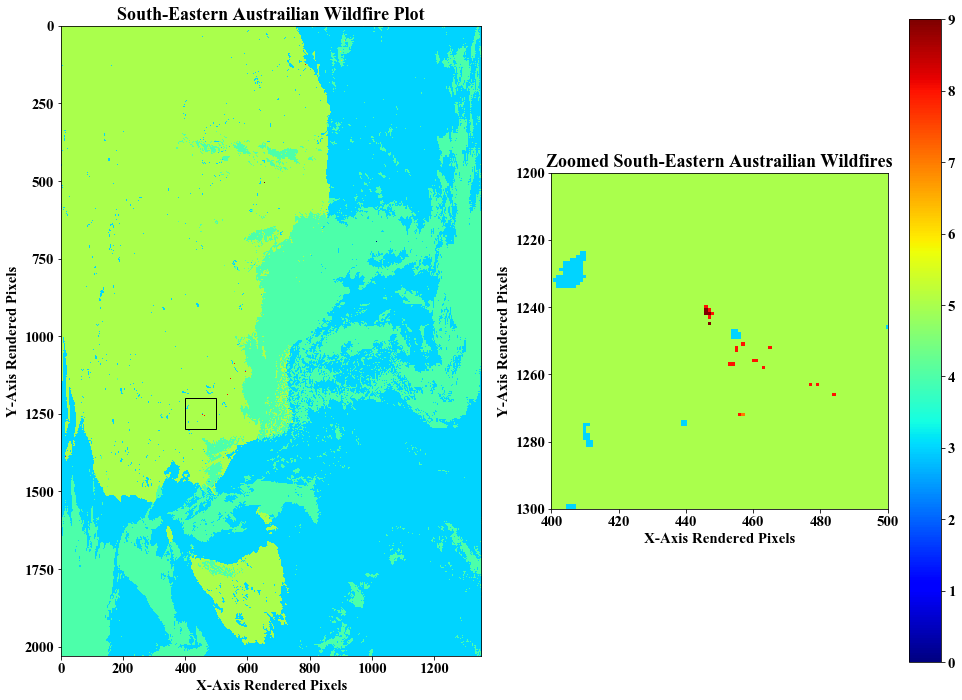

In [137]:
#Opening the .tif file with GDAL and reading the data as an array
dataset = gdal.Open('tif/MOD14.tif').ReadAsArray()

#Plotting The Overall Image
ax = plt.subplot(1, 2, 1)
ax.imshow(dataset)
rect = patches.Rectangle((400,1200),100,100,linewidth=1,edgecolor='k',facecolor='none')
ax.add_patch(rect) # Add the patch to the Axes
plt.set_cmap('jet')
plt.title('South-Eastern Austrailian Wildfire Plot')
plt.xlabel('X-Axis Rendered Pixels')
plt.ylabel('Y-Axis Rendered Pixels')

# Plotting The Specific Fire Location Area
plt.subplot(1, 2, 2)
plt.imshow(dataset)
plt.xlim(400,500) #For setting x-axis limits
plt.ylim(1300,1200) #For setting y-axis limits
plt.title('Zoomed South-Eastern Austrailian Wildfires')
plt.xlabel('X-Axis Rendered Pixels')
plt.ylabel('Y-Axis Rendered Pixels')
plt.tight_layout()
plt.set_cmap('jet')
plt.colorbar()
plt.show()

## Importing the .hdf files with GDAL

In [81]:
%%capture 

MCD = 'hdf/MCD64A1.A2016061.h10v05.006.2017015011604.hdf' #Burned Area

!gdal_translate -sds $MCD tif/MCD1.tif

## Plotting Burned Area

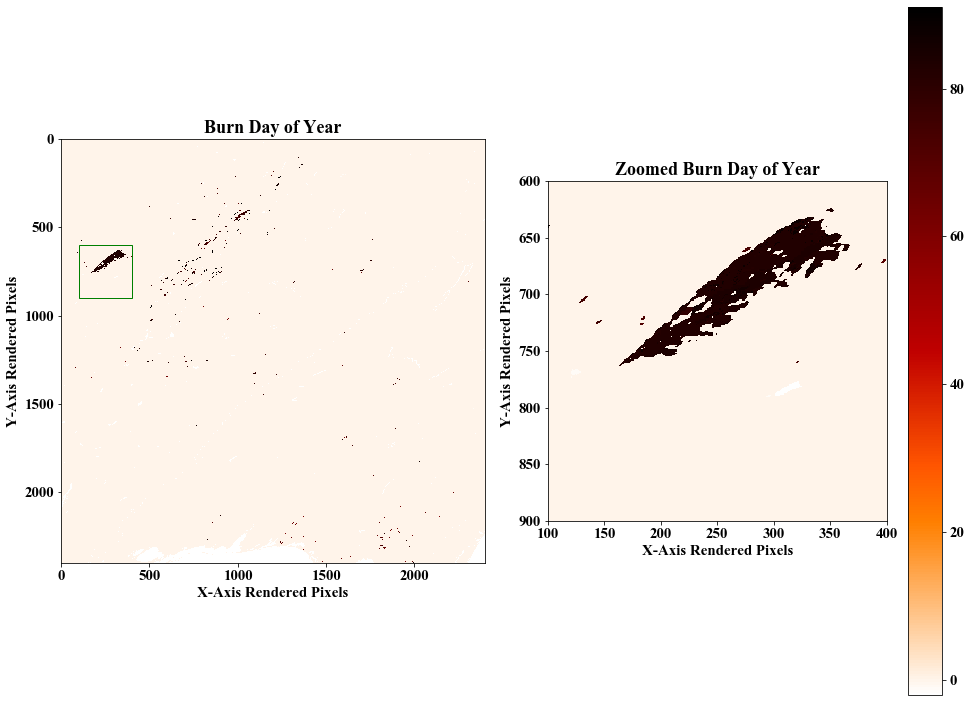

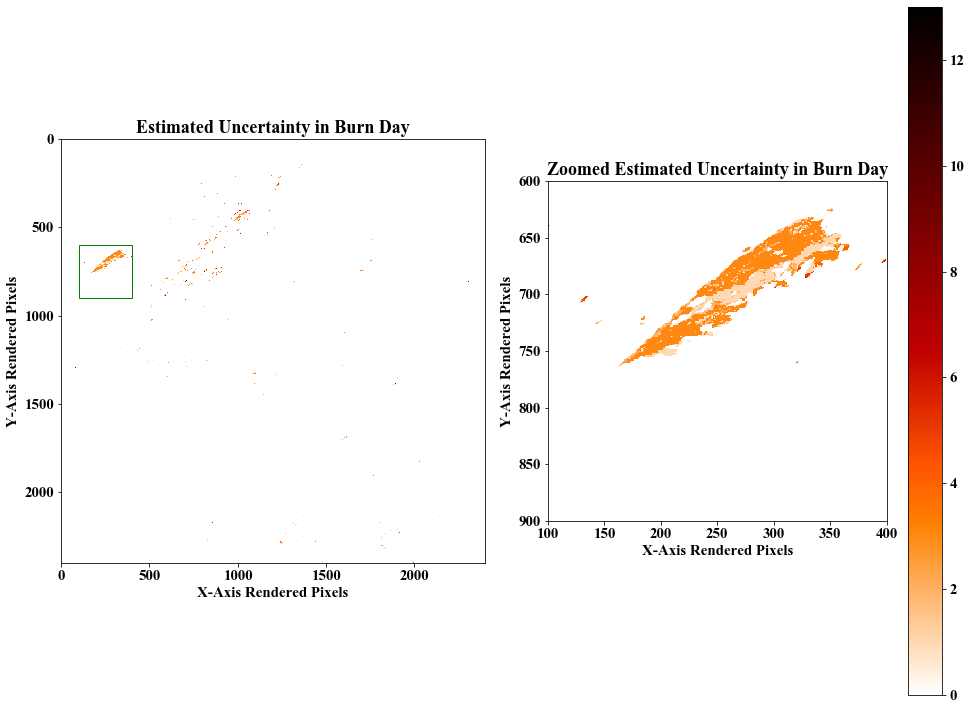

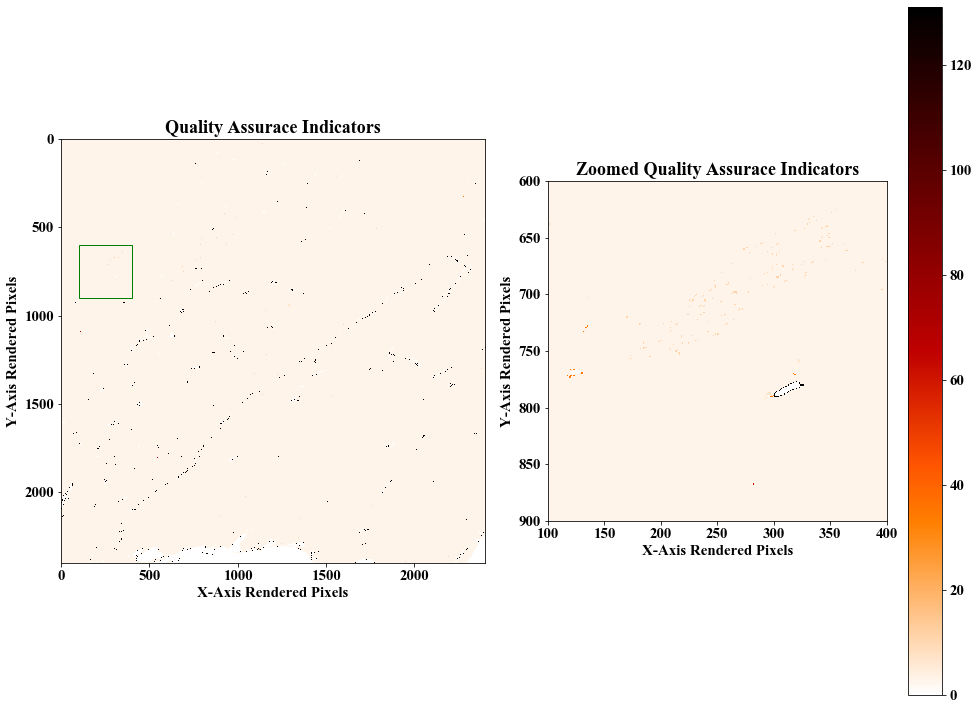

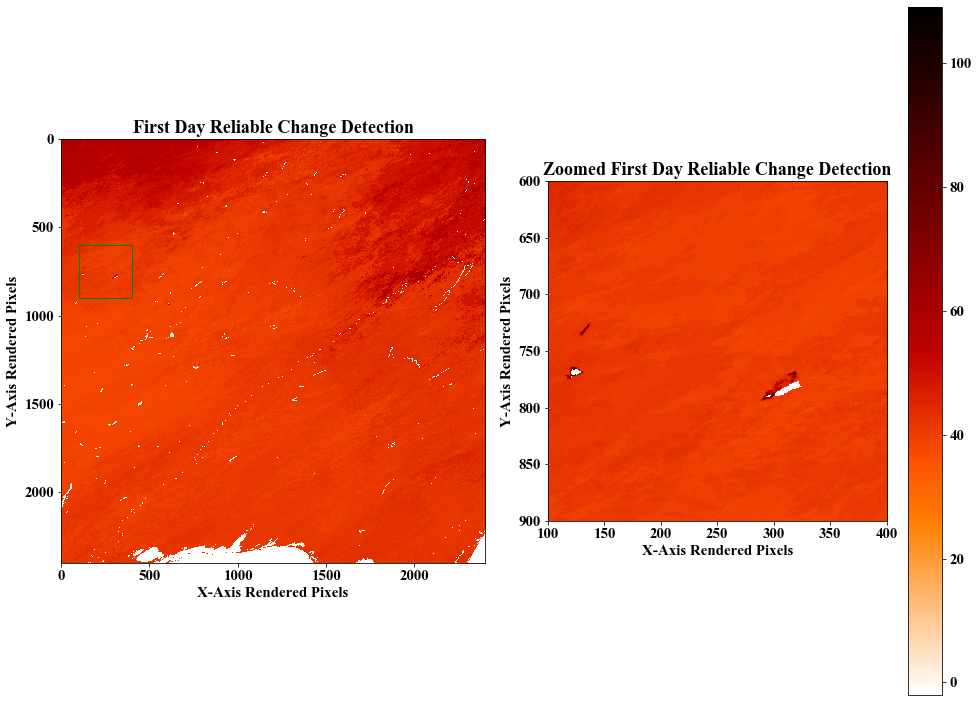

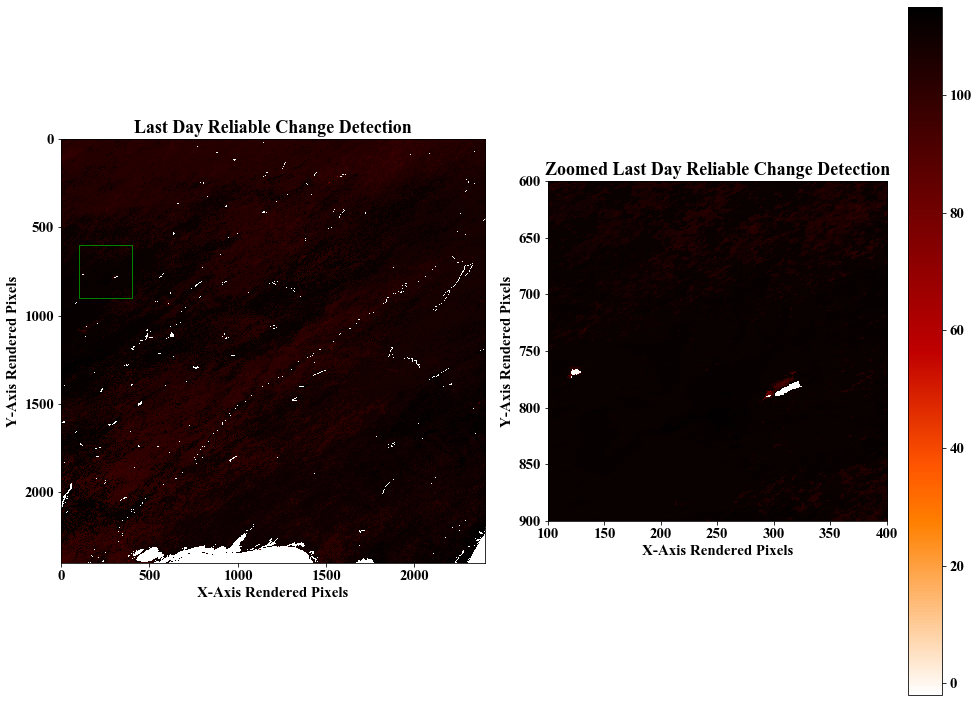

In [133]:
MCD1_1 = gdal.Open("tif/MCD1_1.tif").ReadAsArray()
MCD1_2 = gdal.Open("tif/MCD1_2.tif").ReadAsArray()
MCD1_3 = gdal.Open("tif/MCD1_3.tif").ReadAsArray()
MCD1_4 = gdal.Open("tif/MCD1_4.tif").ReadAsArray()
MCD1_5 = gdal.Open("tif/MCD1_5.tif").ReadAsArray()

def InfPlot (source,name):
    #Plotting The Overall Image
    ax = plt.subplot(1, 2, 1)
    ax.imshow(source)
    rect = patches.Rectangle((100,600),300,300,linewidth=1,edgecolor='g',facecolor='none')
    ax.add_patch(rect) # Add the patch to the Axes
    plt.title(name)
    plt.set_cmap('gist_heat_r')
    plt.xlabel('X-Axis Rendered Pixels')
    plt.ylabel('Y-Axis Rendered Pixels')

    # Plotting The Specific Fire Location Area
    plt.subplot(1, 2, 2)
    plt.imshow(source)
    plt.xlim(100,400) #For setting x-axis limits
    plt.ylim(900,600) #For setting y-axis limits
    plt.title('Zoomed ' + name)
    plt.xlabel('X-Axis Rendered Pixels')
    plt.ylabel('Y-Axis Rendered Pixels')
    plt.tight_layout()
    plt.set_cmap('gist_heat_r')
    plt.colorbar()
    plt.show()
    
InfPlot(MCD1_1,'Burn Day of Year')
InfPlot(MCD1_2,'Estimated Uncertainty in Burn Day')
InfPlot(MCD1_3,'Quality Assurace Indicators')
InfPlot(MCD1_4,'First Day Reliable Change Detection')
InfPlot(MCD1_5,'Last Day Reliable Change Detection')


## Calculating Image Information

In [103]:
def IStat (image):
    print('Image Information for',image)
    #Calculating the Area of the Images in Projected Units
    sat_data = rasterio.open(image)
    width_in_projected_units = sat_data.bounds.right - sat_data.bounds.left
    height_in_projected_units = sat_data.bounds.top - sat_data.bounds.bottom
    print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))
    print("Rows: {}, Columns: {}".format(sat_data.height, sat_data.width))

    # Upper left pixel
    row_min = 0
    col_min = 0

    # Lower right pixel.  Rows and columns are zero indexing.
    row_max = sat_data.height - 1
    col_max = sat_data.width - 1

    # Transform coordinates with the dataset's affine transformation.
    topleft = sat_data.transform * (row_min, col_min)
    botright = sat_data.transform * (row_max, col_max)

    print("Top left corner coordinates: {}".format(topleft))
    print("Bottom right corner coordinates: {}".format(botright))
    print(sat_data.count)

    # Sequence of band indexes
    print(sat_data.indexes)
    print(" ")

IStat("tif/MCD1_1.tif")

Image Information for tif/MCD1_1.tif
Width: 1111950.5196670005, Height: 1111950.519667
Rows: 2400, Columns: 2400
Top left corner coordinates: (-8895604.157328, 4447802.078664)
Bottom right corner coordinates: (-7784116.950377528, 3336314.871713528)
1
(1,)
 
Image Information for tif/MOD9_1.tif
Width: 1111950.5196659993, Height: 1111950.519667
Rows: 4800, Columns: 4800
Top left corner coordinates: (-8895604.157333, 4447802.078667)
Bottom right corner coordinates: (-7783885.294025264, 3336083.215358264)
1
(1,)
 
Image Information for tif/MOD11_01.tif
Width: 1111950.519766001, Height: 1111950.519766
Rows: 1200, Columns: 1200
Top left corner coordinates: (12231455.717432, -3335851.5593)
Bottom right corner coordinates: (13342479.611764863, -4446875.453632861)
1
(1,)
 


In [ ]:
from rasterio.plot import show_hist
src = rasterio.open(im5)
show_hist(src, bins=100, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")
plt.show()

src = rasterio.open(im1)
show_hist(src, bins=150, lw=0.0, stacked=True, alpha=0.3,histtype='bar', title="Histogram")
plt.show()



file_list = ['fresh_2.tif', 'fresh_3.tif']

# Read metadata of first file
with rasterio.open(file_list[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers
meta.update(count = len(file_list))

# Read each layer and write it to stack
with rasterio.open('stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(file_list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))